#**Importing all requred libraries**

In [44]:
import pandas as pd  # Importing pandas library for data manipulation
import nltk  # Importing nltk library for natural language processing tasks
from nltk.corpus import stopwords  # Importing stopwords from nltk corpus
from nltk.tokenize import word_tokenize  # Importing word_tokenize function from nltk tokenize module
import string  # Importing string module for string operations
import seaborn as sns  # Importing seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for plotting graphs
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer for text feature extraction
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression model from scikit-learn
from sklearn.naive_bayes import MultinomialNB  # Importing Multinomial Naive Bayes model from scikit-learn
from sklearn.svm import SVC  # Importing Support Vector Classifier (SVC) model from scikit-learn
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier model from scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Importing evaluation metrics from scikit-learn


#**Data Loading and Exploration**

In [45]:
# Define a function to load data from a text file
def load_data(file_path, is_train=True):
    data_list = []  # Initializing an empty list to store data records
    with open(file_path, 'r', encoding='utf-8') as file:  # Opening the file for reading with UTF-8 encoding
        line = file.readline().strip()  # Reading the first line and stripping any leading/trailing whitespace
        while line:  # Looping through lines until there are no more lines to read
            parts = line.split(' ::: ')  # Splitting the line into parts using ' ::: ' as the delimiter
            if is_train:  # If we are loading training data
                data_list.append({'ID': parts[0], 'TITLE': parts[1], 'GENRE': parts[2], 'DESCRIPTION': parts[3]})  # Adding a dictionary with ID, TITLE, GENRE, and DESCRIPTION to the list
            else:  # If we are loading test or solution data
                data_list.append({'ID': parts[0], 'TITLE': parts[1], 'DESCRIPTION': parts[2]})  # Adding a dictionary with ID, TITLE, and DESCRIPTION to the list
            line = file.readline().strip()  # Reading the next line and stripping any leading/trailing whitespace
    return pd.DataFrame(data_list)  # Returning a pandas DataFrame created from the list of dictionaries

# Loading training, test, and solution data using the load_data function
train_data = load_data('train_data.txt', is_train=True)  # Loading training data
test_data = load_data('test_data.txt', is_train=False)  # Loading test data
solution_data = load_data('test_data_solution.txt', is_train=True)  # Loading solution data (structured like training data)

# Exploring the data
print(f"Number of training samples: {len(train_data)}")  # Printing the number of training samples
print(f"Number of test samples: {len(test_data)}")  # Printing the number of test samples


Number of training samples: 9560
Number of test samples: 9822


In [46]:
print("Printing genre distribution in the training set:")  # Printing a message indicating the genre distribution is being displayed
print(train_data['GENRE'].value_counts())  # Printing the count of each genre in the 'GENRE' column of the training data


Printing genre distribution in the training set:
GENRE
drama          2365
documentary    2307
comedy         1308
short           897
horror          379
thriller        313
action          236
western         194
reality-tv      159
family          138
music           130
adventure       129
romance         114
sci-fi          114
adult           114
animation        85
sport            78
crime            74
talk-show        71
fantasy          65
mystery          56
musical          52
biography        47
history          45
game-show        37
news             31
war              22
Name: count, dtype: int64


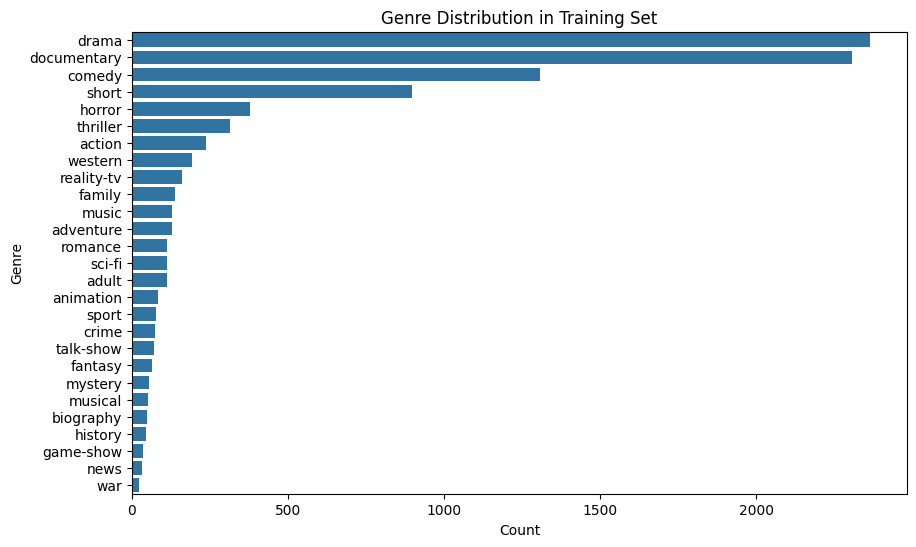

In [47]:
# Visualizing the genre distribution in the training set
plt.figure(figsize=(10, 6))  # Creating a figure with a size of 10x6 inches for the plot
sns.countplot(y=train_data['GENRE'], order=train_data['GENRE'].value_counts().index)  # Creating a count plot of genres in the training data, ordered by frequency
plt.title('Genre Distribution in Training Set')  # Setting the title of the plot
plt.xlabel('Count')  # Labeling the x-axis
plt.ylabel('Genre')  # Labeling the y-axis
plt.show()  # Displaying the plot


#**Data Preprocessing**

In [48]:
# Downloading necessary NLTK data for tokenization and stop words
nltk.download('punkt')  # Downloading punkt tokenizer data
nltk.download('stopwords')  # Downloading stopwords data from NLTK

# Function to preprocess text data
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation from the text
    text = text.lower()  # Converting text to lowercase
    words = word_tokenize(text)  # Tokenizing the text into words
    words = [word for word in words if word not in stopwords.words('english')]  # Removing stop words from the text
    return ' '.join(words)  # Returning the processed text as a single string

# Applying preprocessing to 'DESCRIPTION' column in train_data, test_data, and solution_data
train_data['processed_description'] = train_data['DESCRIPTION'].apply(preprocess_text)  # Applying preprocess_text function to 'DESCRIPTION' column in train_data
test_data['processed_description'] = test_data['DESCRIPTION'].apply(preprocess_text)  # Applying preprocess_text function to 'DESCRIPTION' column in test_data
solution_data['processed_description'] = solution_data['DESCRIPTION'].apply(preprocess_text)  # Applying preprocess_text function to 'DESCRIPTION' column in solution_data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#**Feature Extraction**

In [49]:
# Creating a TF-IDF vectorizer with a maximum of 5000 features
vectorizer = TfidfVectorizer(max_features=5000)

# Transforming the processed descriptions into TF-IDF features for training data
X_train = vectorizer.fit_transform(train_data['processed_description'])

# Transforming the processed descriptions into TF-IDF features for solution data (using the same vectorizer)
X_solution = vectorizer.transform(solution_data['processed_description'])

# Extracting the target labels for training and solution data
y_train = train_data['GENRE']
y_solution = solution_data['GENRE']


#**Model Training and Evaluation**

In [50]:
# Defining a function to evaluate a machine learning model
def evaluate_model(model, X_train, y_train, X_solution, y_solution, model_name):
    model.fit(X_train, y_train)  # Fitting the model on the training data
    y_pred = model.predict(X_solution)  # Making predictions on the solution data
    accuracy = accuracy_score(y_solution, y_pred)  # Calculating accuracy
    print(f'Accuracy ({model_name}): {accuracy}')  # Printing the accuracy of the model
    print(classification_report(y_solution, y_pred))  # Printing the classification report (precision, recall, f1-score, support)
    return accuracy, y_pred  # Returning accuracy and predicted labels


In [51]:
# Printing a message indicating Logistic Regression model evaluation
print("Evaluating Logistic Regression model:")

# Initializing a Logistic Regression model with a maximum of 1000 iterations
logistic_model = LogisticRegression(max_iter=1000)

# Evaluating the Logistic Regression model and storing accuracy and predictions
logistic_acc, logistic_pred = evaluate_model(logistic_model, X_train, y_train, X_solution, y_solution, "Logistic Regression")


Evaluating Logistic Regression model:
Accuracy (Logistic Regression): 0.5280058193910423


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.68      0.05      0.10       237
       adult       0.67      0.02      0.04       102
   adventure       0.64      0.06      0.11       119
   animation       0.00      0.00      0.00       108
   biography       0.00      0.00      0.00        49
      comedy       0.46      0.48      0.47      1288
       crime       0.00      0.00      0.00        72
 documentary       0.59      0.87      0.70      2331
       drama       0.48      0.80      0.60      2473
      family       0.00      0.00      0.00       148
     fantasy       0.00      0.00      0.00        51
   game-show       1.00      0.14      0.24        29
     history       0.00      0.00      0.00        42
      horror       0.72      0.35      0.47       390
       music       0.68      0.14      0.24       133
     musical       0.00      0.00      0.00        41
     mystery       0.00      0.00      0.00        54
        news       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Printing a message indicating Naive Bayes model evaluation
print("Evaluating Naive Bayes model:")

# Initializing a Naive Bayes model (MultinomialNB)
naive_bayes_model = MultinomialNB()

# Evaluating the Naive Bayes model and storing accuracy and predictions
nb_acc, nb_pred = evaluate_model(naive_bayes_model, X_train, y_train, X_solution, y_solution, "Naive Bayes")


Evaluating Naive Bayes model:
Accuracy (Naive Bayes): 0.47428036994700196


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.25      0.00      0.01       237
       adult       0.00      0.00      0.00       102
   adventure       0.00      0.00      0.00       119
   animation       0.00      0.00      0.00       108
   biography       0.00      0.00      0.00        49
      comedy       0.52      0.26      0.35      1288
       crime       0.00      0.00      0.00        72
 documentary       0.55      0.88      0.67      2331
       drama       0.41      0.86      0.56      2473
      family       0.00      0.00      0.00       148
     fantasy       0.00      0.00      0.00        51
   game-show       0.00      0.00      0.00        29
     history       0.00      0.00      0.00        42
      horror       0.92      0.03      0.06       390
       music       0.00      0.00      0.00       133
     musical       0.00      0.00      0.00        41
     mystery       0.00      0.00      0.00        54
        news       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Evaluating Support Vector Machine with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # List of kernel types

svm_results = {}  # Dictionary to store SVM results

for kernel in kernels:  # Iterating through each kernel type
    print(f"Evaluating Support Vector Machine with {kernel} kernel:")  # Printing a message indicating the SVM with the current kernel
    svm_model = SVC(kernel=kernel)  # Initializing SVM with the specified kernel
    svm_acc, svm_pred = evaluate_model(svm_model, X_train, y_train, X_solution, y_solution, f"SVM ({kernel})")  # Evaluating SVM model and storing accuracy and predictions
    svm_results[kernel] = (svm_acc, svm_pred)  # Storing accuracy and predictions in svm_results dictionary with kernel type as key


Evaluating Support Vector Machine with linear kernel:
Accuracy (SVM (linear)): 0.5408916138418373


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.49      0.18      0.26       237
       adult       0.50      0.13      0.20       102
   adventure       0.50      0.18      0.26       119
   animation       1.00      0.03      0.05       108
   biography       0.00      0.00      0.00        49
      comedy       0.45      0.51      0.48      1288
       crime       0.00      0.00      0.00        72
 documentary       0.63      0.83      0.72      2331
       drama       0.50      0.76      0.60      2473
      family       0.83      0.03      0.06       148
     fantasy       0.00      0.00      0.00        51
   game-show       0.89      0.55      0.68        29
     history       0.00      0.00      0.00        42
      horror       0.67      0.47      0.55       390
       music       0.58      0.32      0.41       133
     musical       0.00      0.00      0.00        41
     mystery       0.00      0.00      0.00        54
        news       0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.00      0.00      0.00       237
       adult       0.00      0.00      0.00       102
   adventure       0.00      0.00      0.00       119
   animation       0.00      0.00      0.00       108
   biography       0.00      0.00      0.00        49
      comedy       0.64      0.01      0.02      1288
       crime       0.00      0.00      0.00        72
 documentary       0.51      0.83      0.64      2331
       drama       0.37      0.87      0.52      2473
      family       1.00      0.03      0.05       148
     fantasy       0.00      0.00      0.00        51
   game-show       0.00      0.00      0.00        29
     history       0.00      0.00      0.00        42
      horror       0.00      0.00      0.00       390
       music       0.00      0.00      0.00       133
     musical       0.00      0.00      0.00        41
     mystery       0.00      0.00      0.00        54
        news       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.67      0.01      0.02       237
       adult       0.00      0.00      0.00       102
   adventure       0.43      0.03      0.05       119
   animation       0.00      0.00      0.00       108
   biography       0.00      0.00      0.00        49
      comedy       0.50      0.41      0.45      1288
       crime       0.00      0.00      0.00        72
 documentary       0.58      0.88      0.70      2331
       drama       0.45      0.84      0.58      2473
      family       1.00      0.01      0.03       148
     fantasy       0.00      0.00      0.00        51
   game-show       0.91      0.34      0.50        29
     history       0.00      0.00      0.00        42
      horror       0.74      0.23      0.35       390
       music       0.93      0.11      0.19       133
     musical       0.00      0.00      0.00        41
     mystery       0.00      0.00      0.00        54
        news       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.54      0.18      0.27       237
       adult       0.50      0.12      0.19       102
   adventure       0.54      0.18      0.28       119
   animation       1.00      0.01      0.02       108
   biography       0.00      0.00      0.00        49
      comedy       0.45      0.50      0.47      1288
       crime       0.00      0.00      0.00        72
 documentary       0.62      0.83      0.71      2331
       drama       0.49      0.77      0.60      2473
      family       1.00      0.03      0.07       148
     fantasy       0.00      0.00      0.00        51
   game-show       0.89      0.55      0.68        29
     history       0.00      0.00      0.00        42
      horror       0.67      0.46      0.55       390
       music       0.61      0.32      0.42       133
     musical       0.00      0.00      0.00        41
     mystery       0.00      0.00      0.00        54
        news       0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Printing a message indicating Random Forest model evaluation
print("Evaluating Random Forest model:")

# Initializing a Random Forest model with 100 estimators
random_forest_model = RandomForestClassifier(n_estimators=100)

# Evaluating the Random Forest model and storing accuracy and predictions
rf_acc, rf_pred = evaluate_model(random_forest_model, X_train, y_train, X_solution, y_solution, "Random Forest")


Evaluating Random Forest model:
Accuracy (Random Forest): 0.47448820534136965


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.55      0.03      0.05       237
       adult       0.00      0.00      0.00       102
   adventure       0.62      0.11      0.19       119
   animation       0.00      0.00      0.00       108
   biography       0.00      0.00      0.00        49
      comedy       0.47      0.26      0.33      1288
       crime       0.00      0.00      0.00        72
 documentary       0.54      0.85      0.66      2331
       drama       0.42      0.82      0.55      2473
      family       0.80      0.03      0.05       148
     fantasy       0.00      0.00      0.00        51
   game-show       0.73      0.38      0.50        29
     history       0.00      0.00      0.00        42
      horror       0.60      0.09      0.15       390
       music       0.65      0.11      0.19       133
     musical       0.00      0.00      0.00        41
     mystery       0.00      0.00      0.00        54
        news       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Model Comparison**

In [55]:
# Creating a dictionary to store model accuracies
results = {
    "Logistic Regression": logistic_acc,  # Storing Logistic Regression model accuracy
    "Naive Bayes": nb_acc,  # Storing Naive Bayes model accuracy
    "Random Forest": rf_acc,  # Storing Random Forest model accuracy
}

# Updating the results dictionary with SVM model accuracies for each kernel
results.update({f"SVM ({k})": v[0] for k, v in svm_results.items()})

# Printing a message indicating model comparison
print("\nModel Comparison:")

# Iterating through the results dictionary and printing each model's accuracy
for model_name, acc in results.items():
    print(f"{model_name}: {acc}")  # Printing model name and accuracy



Model Comparison:
Logistic Regression: 0.5280058193910423
Naive Bayes: 0.47428036994700196
Random Forest: 0.47448820534136965
SVM (linear): 0.5408916138418373
SVM (poly): 0.42949184246077104
SVM (rbf): 0.5128338356022031
SVM (sigmoid): 0.5370466590460355


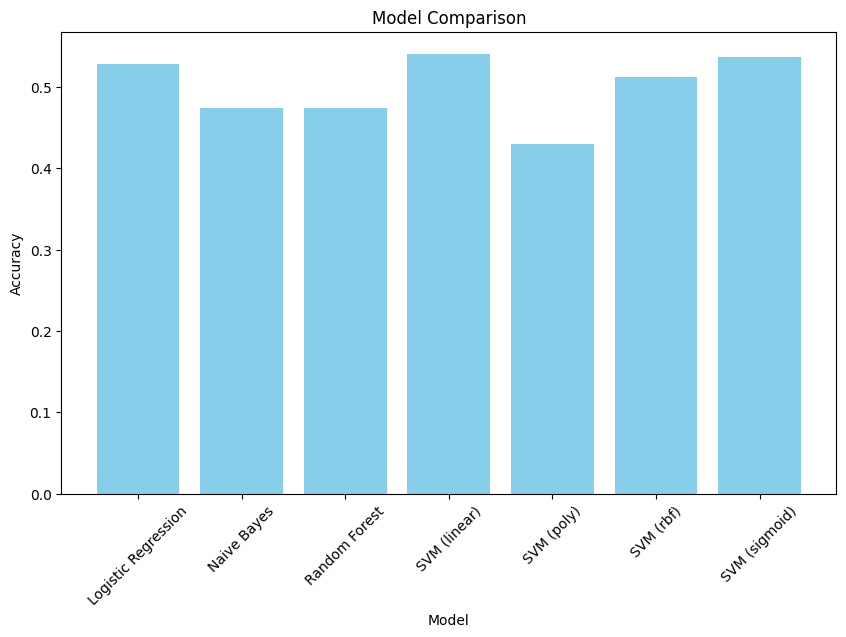

In [56]:
# Visualizing the model comparison using a bar plot
plt.figure(figsize=(10, 6))  # Creating a figure with a size of 10x6 inches
plt.bar(results.keys(), results.values(), color='skyblue')  # Creating a bar plot with model names on x-axis and accuracies on y-axis
plt.title('Model Comparison')  # Setting the title of the plot
plt.xlabel('Model')  # Labeling the x-axis
plt.ylabel('Accuracy')  # Labeling the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot


#**Visualization**

In [57]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)  # Generating confusion matrix
    plt.figure(figsize=(10, 7))  # Creating a figure with size 10x7 inches
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_true), yticklabels=set(y_true))  # Plotting heatmap with annotations, using 'Blues' colormap
    plt.title(f'Confusion Matrix for {model_name}')  # Setting title of the plot
    plt.xlabel('Predicted')  # Labeling x-axis
    plt.ylabel('Actual')  # Labeling y-axis
    plt.show()  # Displaying the plot


Confusion Matrix for Logistic Regression:


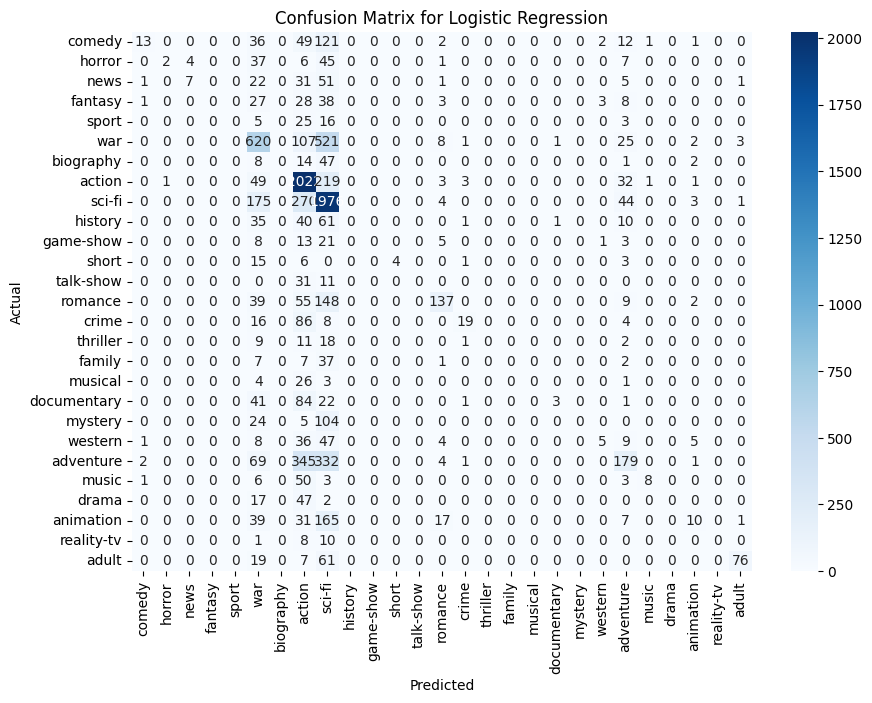

In [58]:
# Printing a message indicating the Confusion Matrix for Logistic Regression
print("Confusion Matrix for Logistic Regression:")
# Plotting the confusion matrix for Logistic Regression
plot_confusion_matrix(y_solution, logistic_pred, "Logistic Regression")


Confusion Matrix for Naive Bayes:


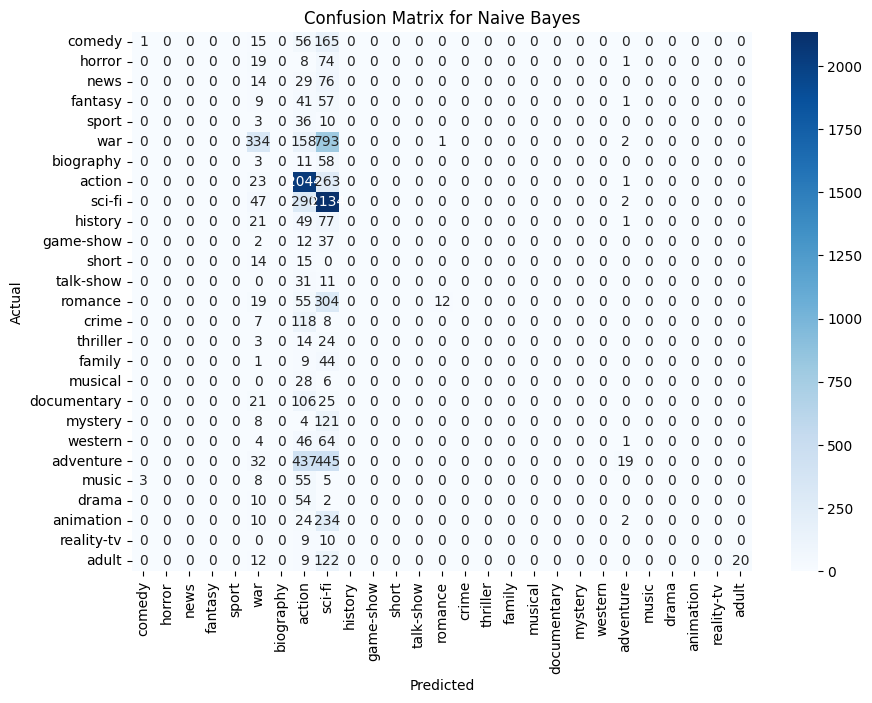

In [59]:
# Printing a message indicating the Confusion Matrix for Naive Bayes
print("Confusion Matrix for Naive Bayes:")
# Plotting the confusion matrix for Naive Bayes
plot_confusion_matrix(y_solution, nb_pred, "Naive Bayes")


Confusion Matrix for Random Forest:


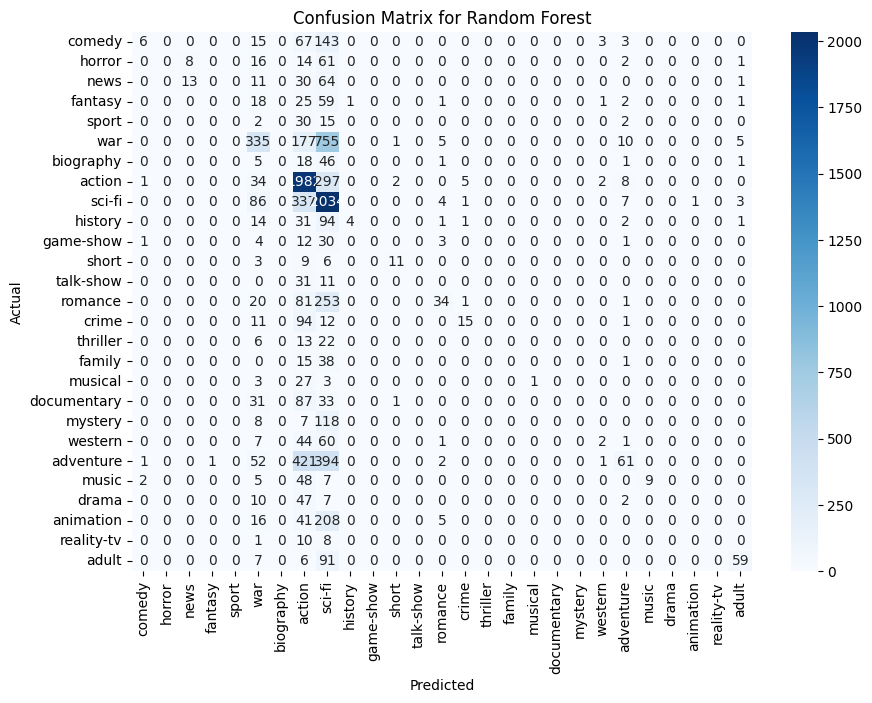

In [60]:
# Printing a message indicating the Confusion Matrix for Random Forest
print("Confusion Matrix for Random Forest:")
# Plotting the confusion matrix for Random Forest
plot_confusion_matrix(y_solution, rf_pred, "Random Forest")


Confusion Matrix for SVM (linear kernel):


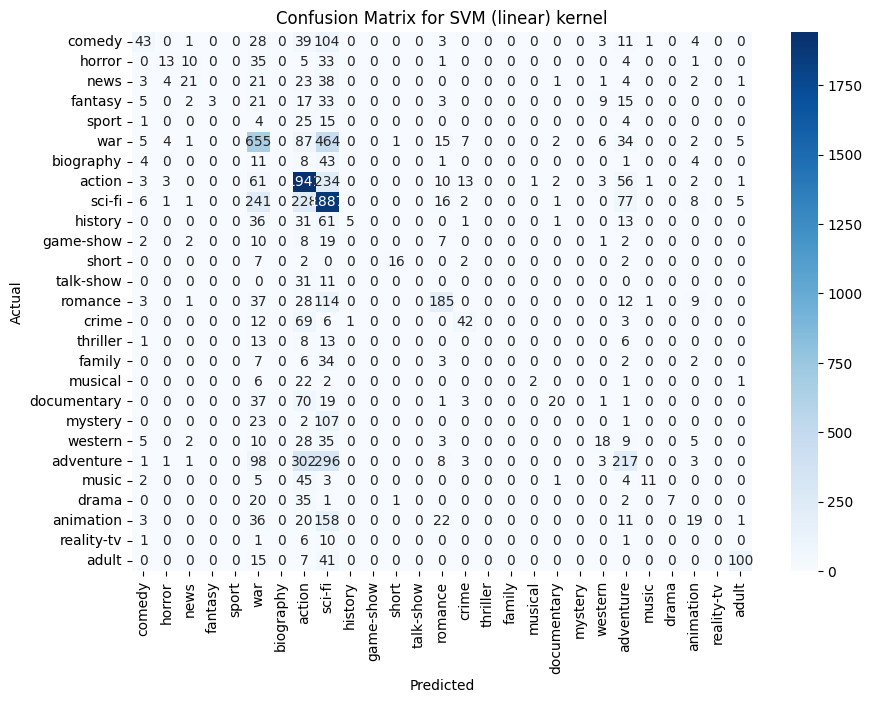

Confusion Matrix for SVM (poly kernel):


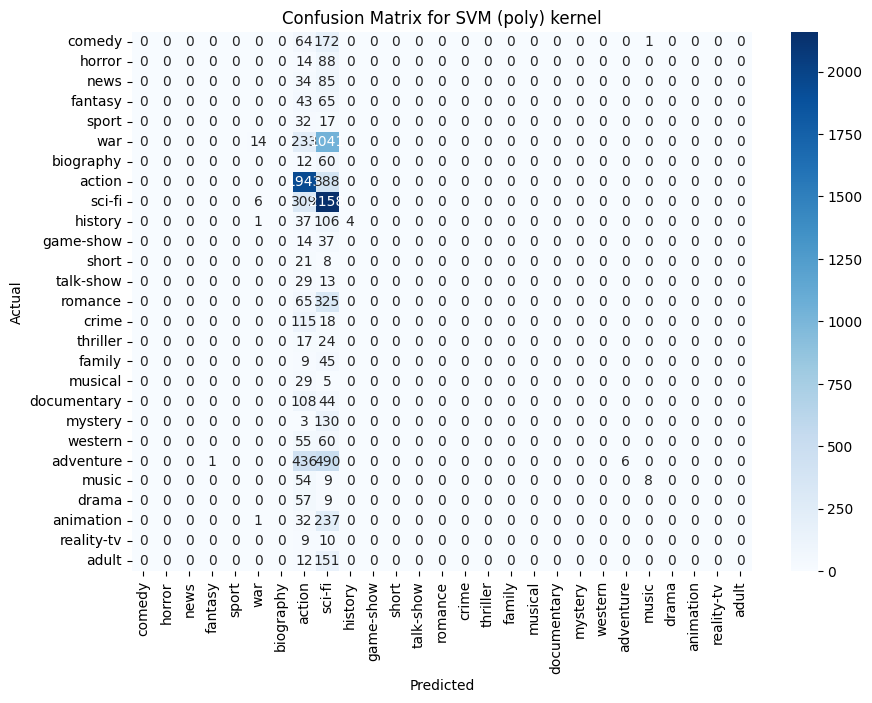

Confusion Matrix for SVM (rbf kernel):


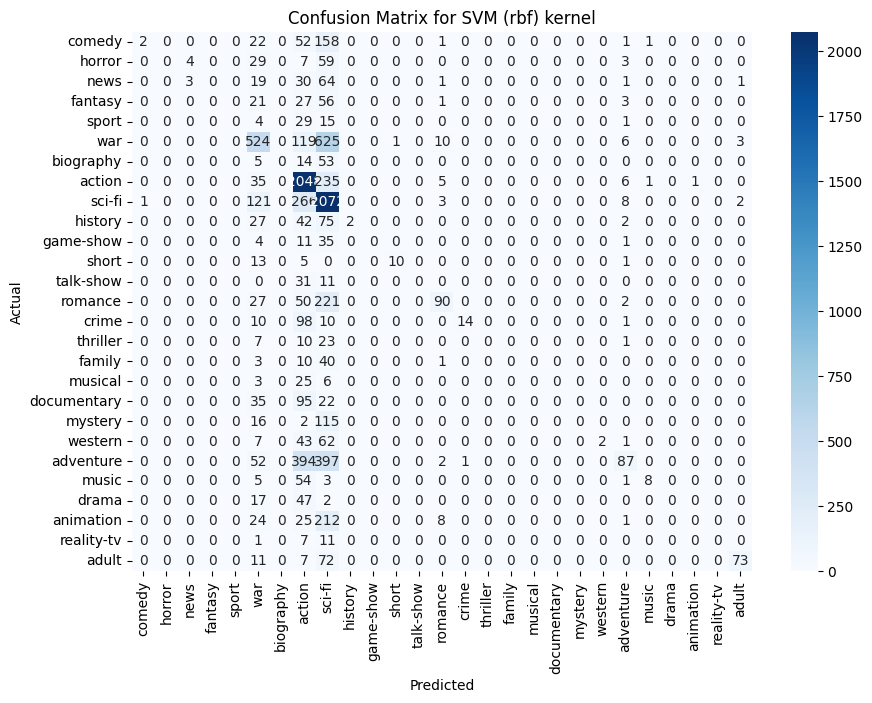

Confusion Matrix for SVM (sigmoid kernel):


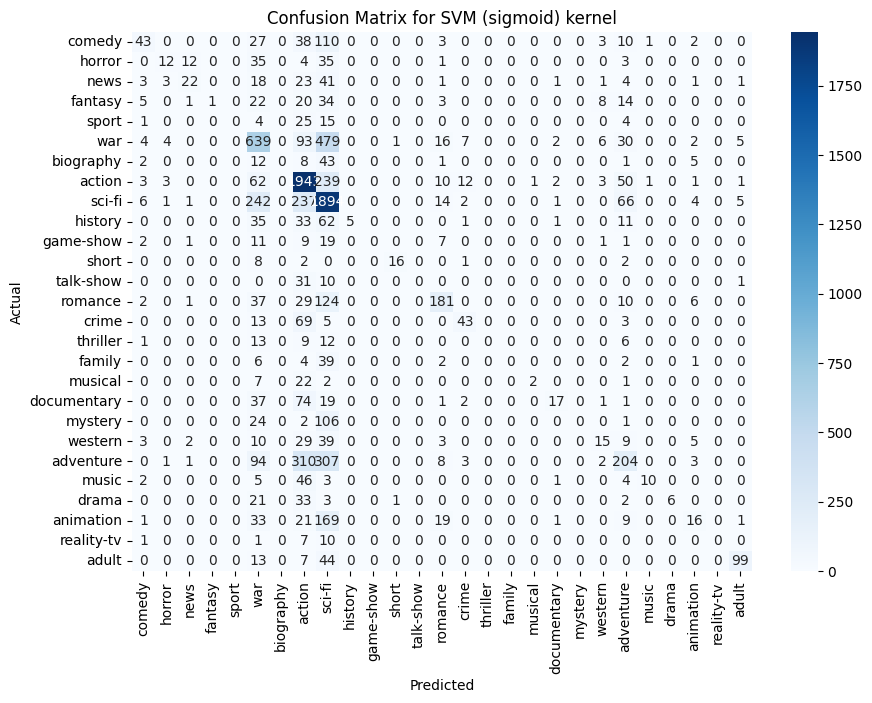

In [61]:
# Iterating through SVM results to print and plot confusion matrices for each kernel
for kernel, (_, pred) in svm_results.items():
    print(f"Confusion Matrix for SVM ({kernel} kernel):")  # Printing a message indicating the Confusion Matrix for each SVM kernel
    plot_confusion_matrix(y_solution, pred, f"SVM ({kernel}) kernel")  # Plotting the confusion matrix for each SVM kernel
